## Lab 8 Semantic Analysis Part 2

In this notebok, you learn how to create an LSTM model with multiple layers, preprocess the text data, train the model, and evaluate its performance in the context of sentiment analysis. You will learn how to build an LSTM model to analyse the reviews in the dataset and classify these reviews as positive or negative sentiment. 
* Dataset used: the IMDB movie review dataset which is available in tensorflow keras datasets. The dataset contains 50,000 movie reviews, divided into 25,000 for training and 25,000 for testing, labelled as positive or negative.
* Machine learning platform: TensorFlow and Keras library. 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 20000  # Consider only the top 50,000 words from the dataset
maxlen = 500 # Truncate or pad sequences to this length
batch_size = 32  # Number of samples processed before the model is updated

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading data...
25000 train sequences
25000 test sequences


In [2]:
print("Before padding:")
print("Length of the first training sequence: ", len(input_train[0]))
print("First training sequence: ", input_train[0])

Before padding:
Length of the first training sequence:  218
First training sequence:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113

In [3]:
# Decode the content to words
word_index = imdb.get_word_index()
def decode_review(review):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

decode_review(input_train[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what t

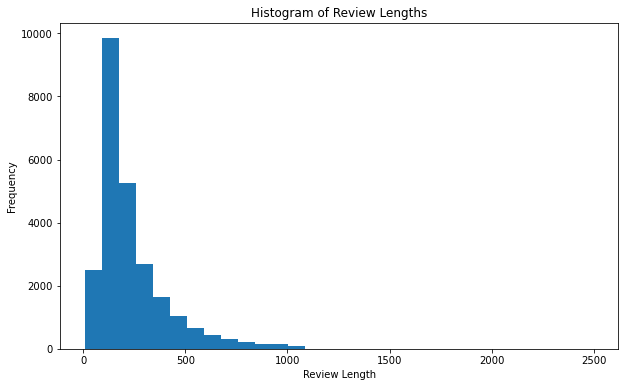

In [4]:
import matplotlib.pyplot as plt

# Get lengths of the reviews
review_lengths = [len(review) for review in input_train]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=30)
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [5]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
# Print some sequences after padding
print("\nAfter padding:")
print("Length of the first training sequence: ", len(input_train[0]))
print("First training sequence: ", input_train[0])


After padding:
Length of the first training sequence:  500
First training sequence:  [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0  

In [7]:
'''
The model will consist of an embedding layer to convert word indices into dense vectors, 
followed by an LSTM layer, and then a fully connected layer to produce the final sentiment probabilities.
'''

from tensorflow.keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import LSTM, Embedding, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=9,
batch_size=128,
validation_split=0.2)

Epoch 1/9
157/157 [==============================] - 78s 481ms/step - loss: 0.5987 - acc: 0.6721 - val_loss: 0.4517 - val_acc: 0.8130
Epoch 2/9
157/157 [==============================] - 63s 400ms/step - loss: 0.3459 - acc: 0.8602 - val_loss: 0.3453 - val_acc: 0.8550
Epoch 3/9
157/157 [==============================] - 31s 197ms/step - loss: 0.2542 - acc: 0.9026 - val_loss: 0.3540 - val_acc: 0.8610
Epoch 4/9
157/157 [==============================] - 36s 231ms/step - loss: 0.2128 - acc: 0.9204 - val_loss: 0.2856 - val_acc: 0.8876
Epoch 5/9
157/157 [==============================] - 39s 245ms/step - loss: 0.1787 - acc: 0.9351 - val_loss: 0.4440 - val_acc: 0.8664
Epoch 6/9
157/157 [==============================] - 43s 276ms/step - loss: 0.1612 - acc: 0.9436 - val_loss: 0.3181 - val_acc: 0.8762
Epoch 7/9
157/157 [==============================] - 47s 302ms/step - loss: 0.1289 - acc: 0.9557 - val_loss: 0.5646 - val_acc: 0.8366
Epoch 8/9
157/157 [==============================] - 46s 294ms

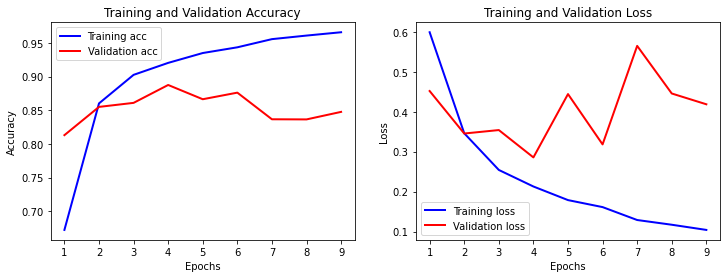

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(epochs, acc, 'b', label='Training acc', linewidth=2)
ax1.plot(epochs, val_acc, 'r', label='Validation acc', linewidth=2)
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss', linewidth=2)
ax2.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=2)
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f'Test accuracy: {test_acc}')

782/782 [==============================] - 38s 48ms/step - loss: 0.4218 - acc: 0.8465
Test accuracy: 0.8464800119400024


In [10]:
import numpy as np

def decode_review(review):
    # Remove any padding tokens
    review = [token for token in review if token != 0]
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

for i in range(100, 110):
    # Convert the i-th review to a numpy array and expand its dimensions
    review = np.expand_dims(input_test[i], axis=0)

    # Get the prediction for the i-th review
    prediction = model.predict(review)[0][0]
    predicted_label = "positive" if prediction > 0.5 else "negative"

    # Get the actual label
    actual_label = "positive" if y_train[i] == 1 else "negative"

    # Print the original review, the predicted result, and the actual label
    print(f"Review {i+1}:")
    print(decode_review(input_test[i]))
    print("Predicted sentiment: ", predicted_label)
    print("Actual sentiment: ", actual_label)
    print("\n")

1/1 [==============================] - 0s 428ms/step
Review 101:
? a quick glance at the premise of this film would seem to indicate just another dumb '80's inbred ? slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread mounting tension amidst a lovely scenic backdrop these feelings are further heightened by a cast of realistically likable characters and antagonists that are more amoral than cardboard ? of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' ? came from
Predicted sentiment:  negative
Actual sentiment:  negative


1/1 [==============================] - 0s 38ms/step
Review 102:
? ? is the first of its kind in turkish cinema and it's way better than

1/1 [==============================] - 0s 30ms/step
Review 107:
? this is a parody that means there are no characters as such they are all plain stereotypes and the movie relies completely on the quality of the jokes br br well there are quite some good jokes in this movie unfortunately they are hidden in a mass of real stupid ones if one expects all dialogues to be absurd the fun wears off br br you see there is american pie 2 my all time favorite teenager movie it contains a lot of real original characters maybe the jokes are tasteless but all the people have some kind of live for example they feel embarrassed if something embarrassing happens that is what makes the jokes themselves actually funny br br not so this movie every scene is clearly arranged as a pure parody so there are no characters at all therefore there is really no room for any sympathy too if you know the original movies you know whole scenes in advance add the fact that many jokes are not funny at all and you have t